In [16]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

`Carefully Crop`

In [18]:
res_feat = np.load('./Features/res-feat.npy')
#vgg_feat = np.load('./Features/vgg-feat.npy')

In [19]:
res_feat_acpca = np.load('./Features/res-feat-acpca.npy')

In [20]:
label_ = res_feat[:, 2048].astype(int)

res_feat_ = res_feat[:, :2048]
vgg_feat_ = vgg_feat[:, :512]
group_ = res_feat[:, 2049].astype(int)

In [21]:
tsne = TSNE(n_components=2)
pca = PCA(n_components=10)

In [5]:
res_feat_dr = {}
## TSNE embedding
res_feat_dr['tsne'] = tsne.fit_transform(res_feat_)
## PCA embedding
res_feat_dr['pca'] = pca.fit_transform(res_feat_)[:,2:4] # PCA-2 vs PCA-3

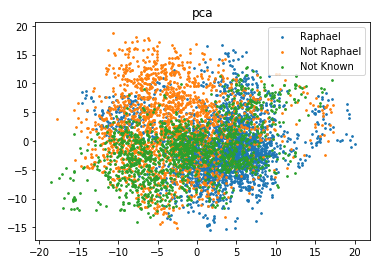

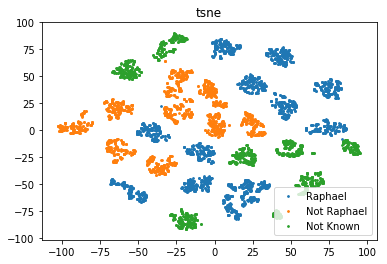

In [45]:
for method in ['pca','tsne']:
    plt.scatter(res_feat_dr[method][label_==1, 0], res_feat_dr[method][label_==1, 1], s=3, label = 'Raphael')
    plt.scatter(res_feat_dr[method][label_==-1, 0], res_feat_dr[method][label_==-1, 1], s=3, label = 'Not Raphael')
    plt.scatter(res_feat_dr[method][label_==0, 0], res_feat_dr[method][label_==0, 1], s=3, label = 'Not Known')
    plt.legend()
    plt.title(method)
    plt.show()

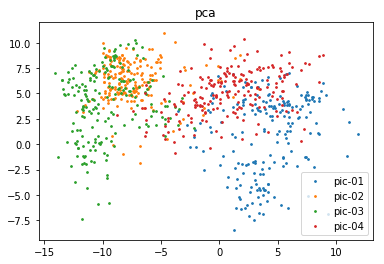

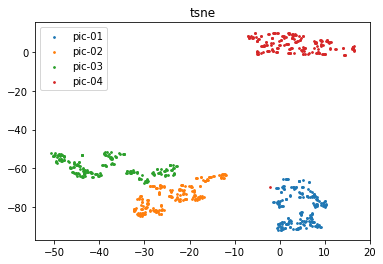

In [15]:
for method in ['pca','tsne']:
    for idx, g in enumerate(np.unique(group_)[:4]):
        plt.scatter(res_feat_dr[method][group_==g, 0],
                    res_feat_dr[method][group_==g, 1],
                    s=3, label = 'pic-'+str(g+1).zfill(2))
    plt.legend()
    plt.title(method)
    plt.show()    

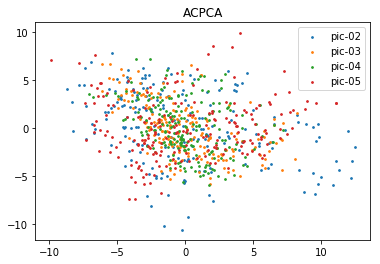

In [25]:
for idx, g in enumerate(np.unique(group_)[:4]):
    plt.scatter(res_feat_acpca[group_==g, 0],
                res_feat_acpca[group_==g, 1],
                s=3, label = 'pic-'+str(g+1).zfill(2))
plt.legend()
plt.title('ACPCA')
plt.show()    

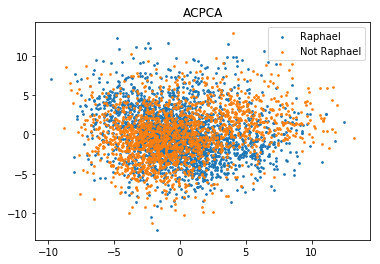

In [28]:
plt.scatter(res_feat_acpca[label_==1, 0], res_feat_acpca[label_==1, 1], s=3, label = 'Raphael')
plt.scatter(res_feat_acpca[label_==-1, 0], res_feat_acpca[label_==-1, 1], s=3, label = 'Not Raphael')
#plt.scatter(res_feat_acpca[label_==0, 0], res_feat_acpca[label_==0, 1], s=3, label = 'Not Known')
plt.legend()
plt.title('ACPCA')
plt.show()  